<a href="https://www.kaggle.com/code/yazanjian/students-performance-notebook?scriptVersionId=146011263" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Students Performance Study
In this notebook, we are going to study the performance of some students based on the folllowing [dataset](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams) 

The notebook is divided into sections as follows: 
1. Dataset Import: Load and read the dataset
2. Some Analysis: Study the dataset and the relations between the features. 
3. Data Preprocessing: Transform the problem into classification problem by averaging the three exam results and replace the average with a binary category; Pass >= 65 and No Pass < 65. Then do categorical encoding. 
4. Model Training and Evaluation: Using some ML models available in sklearn library 


**Note**: This notebook uses a utility file developed by the same author, and available [here](https://www.kaggle.com/code/yazanjian/utils) on kaggle

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import utils

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA

from sklearn.preprocessing import OrdinalEncoder

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-performance-in-exams/StudentsPerformance.csv


# Dataset Import

In [2]:
# Read the dataframe
df = pd.read_csv('/kaggle/input/students-performance-in-exams/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Some Analysis
In this section we are goining to check the following: 
1. The number of null values for each column
2. Visualize the frequency of each value per feature
3. Analyze any possible relation between 

In [3]:
# Print some details of the loaded df
print("The total number of records is: {} with {} features \n".format(df.shape[0], df.shape[1]))
print("Data description \n {} \n".format(df.describe()))
print("{} \n".format(df.info()))

The total number of records is: 1000 with 8 features 

Data description 
        math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-nu

gender 0 Inside second
race/ethnicity 1 Inside second
parental level of education 2 Inside second
lunch 3 Inside second
test preparation course 4 Inside second
math score 5 Inside first
reading score 6 Inside first
writing score 7 Inside first


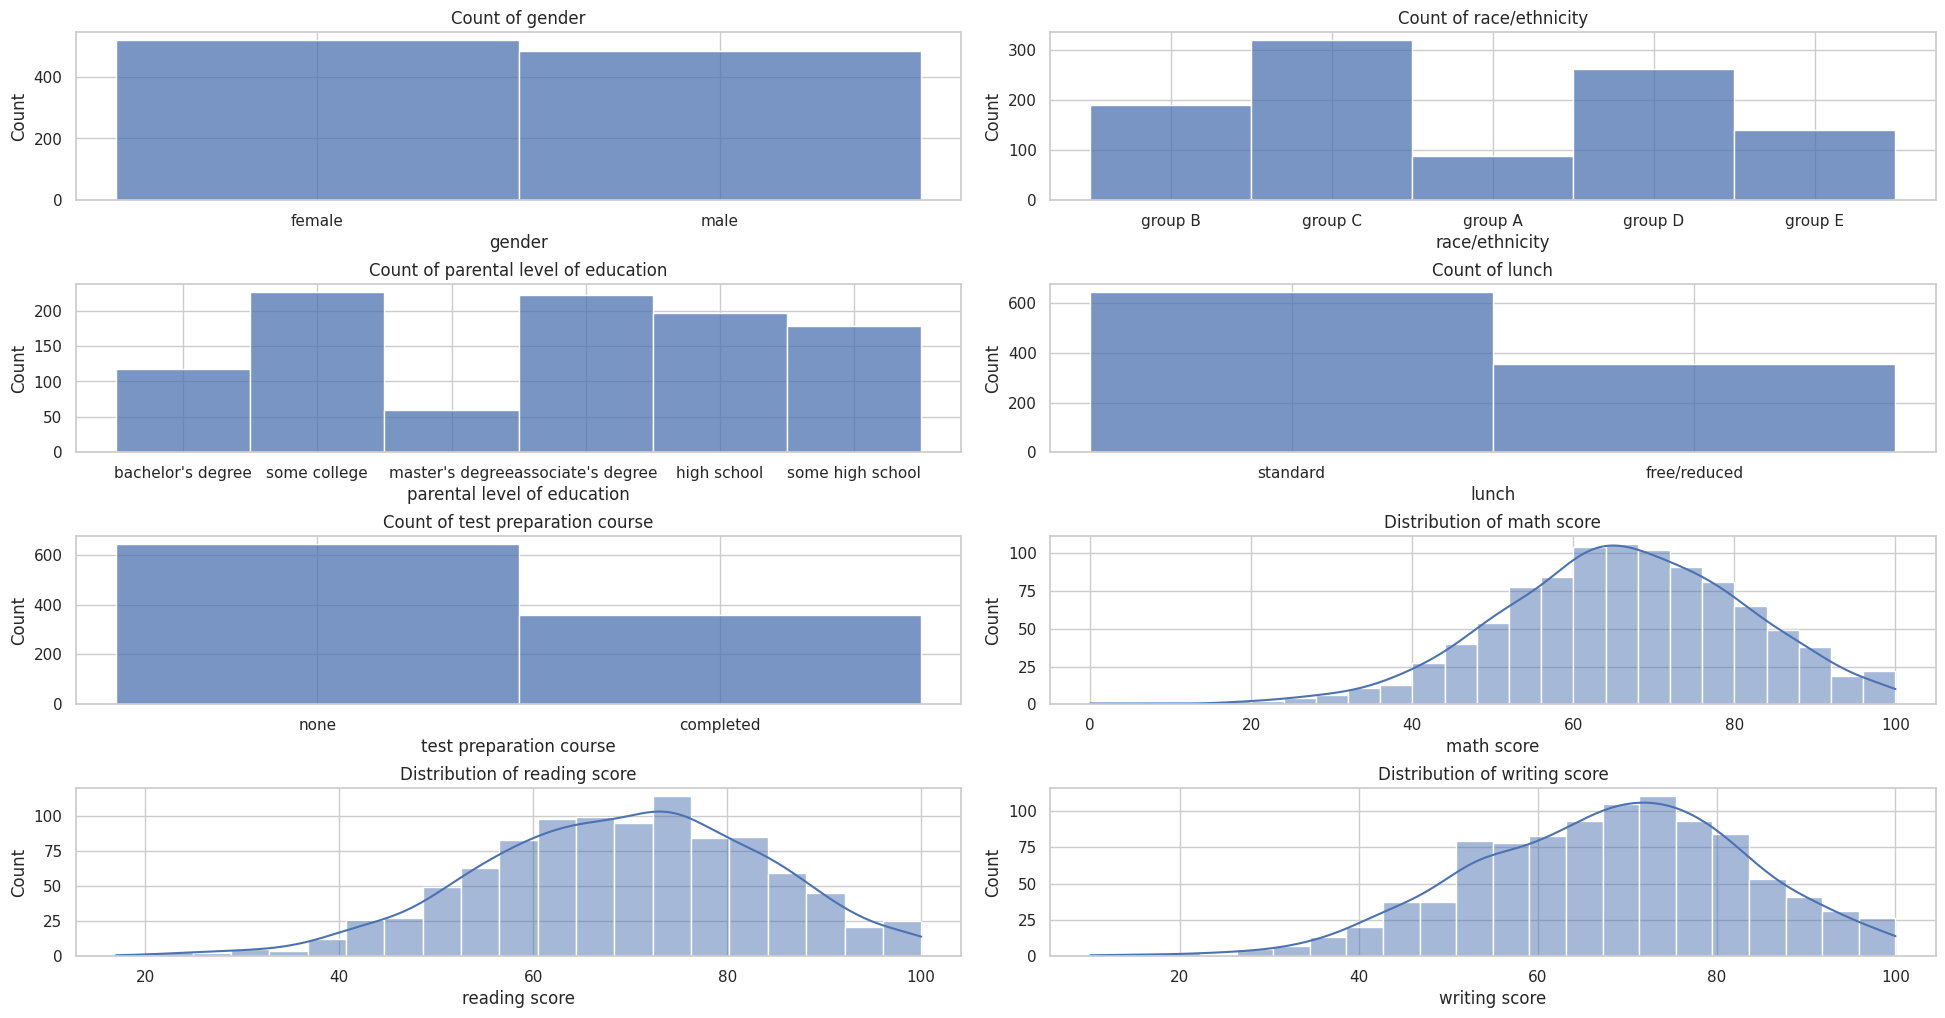

In [4]:
# Visualize features
utils.visualize_features(df)

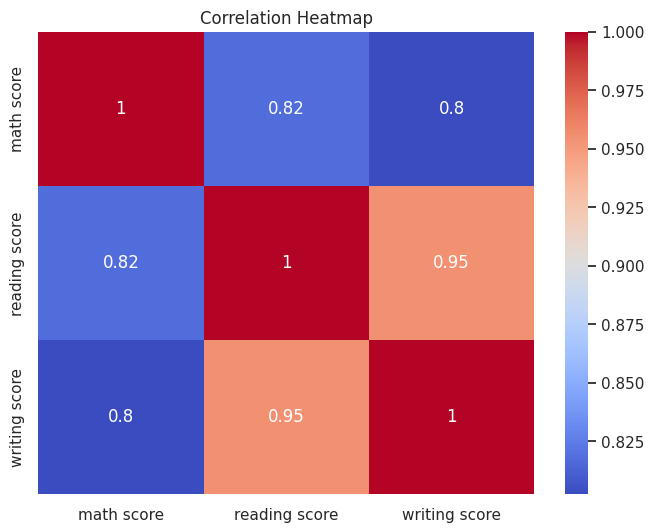

In [5]:
# Plot the correlation matrix between the three exams scores
correlation_columns = ['math score', 'reading score', 'writing score']
utils.plot_correlation_figure(df, correlation_columns)

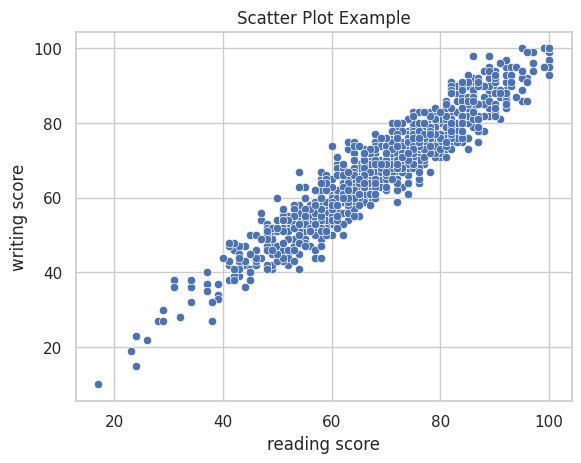

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot
sns.scatterplot(x=df['reading score'], y=df['writing score'])

# Add labels and title
plt.xlabel('reading score')
plt.ylabel('writing score')
plt.title('Scatter Plot Example')

# Show the plot
plt.show()


### Analysis Discussion:
* As we can notice from the previous cells, we have **1000 records**, with **no missing data**. 
* We have **5 categorical features** with **3 numerical attributes** (exam results). 
* Test preparation course and lunch features have imbalanced data. 
* Overall, there is a correlation between the three exams. Moroever, **there is a clear relationship between the writing exam score and reading exam score**. 

# Data Preprocessing 

In this section, we are going to do the following:
1. Convert the problem in hand into classification problem. The process for that is to calculate the avg. for all the three exams. After that, **all avg. results >= 65** will be **labled as True** and **all results < 65** will be **labled as False**. 
2. Extract the target and features dfs.
3. Categorical Encoding.

##### 1. Convert the problem into classification

In [7]:
df['Passed'] = df[['math score', 'reading score', 'writing score']].mean(axis=1) >= 65
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Passed
0,female,group B,bachelor's degree,standard,none,72,72,74,True
1,female,group C,some college,standard,completed,69,90,88,True
2,female,group B,master's degree,standard,none,90,95,93,True
3,male,group A,associate's degree,free/reduced,none,47,57,44,False
4,male,group C,some college,standard,none,76,78,75,True
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,True
996,male,group C,high school,free/reduced,none,62,55,55,False
997,female,group C,high school,free/reduced,completed,59,71,65,True
998,female,group D,some college,standard,completed,68,78,77,True


In [8]:
# Drop the exam results and keep the Passed column
df.drop(columns=['math score', 'reading score', 'writing score'], inplace=True)
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,Passed
0,female,group B,bachelor's degree,standard,none,True
1,female,group C,some college,standard,completed,True
2,female,group B,master's degree,standard,none,True
3,male,group A,associate's degree,free/reduced,none,False
4,male,group C,some college,standard,none,True
...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,True
996,male,group C,high school,free/reduced,none,False
997,female,group C,high school,free/reduced,completed,True
998,female,group D,some college,standard,completed,True


In [9]:
df[['Passed']].describe()

,Passed
count,1000
unique,2
top,True
freq,601


<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


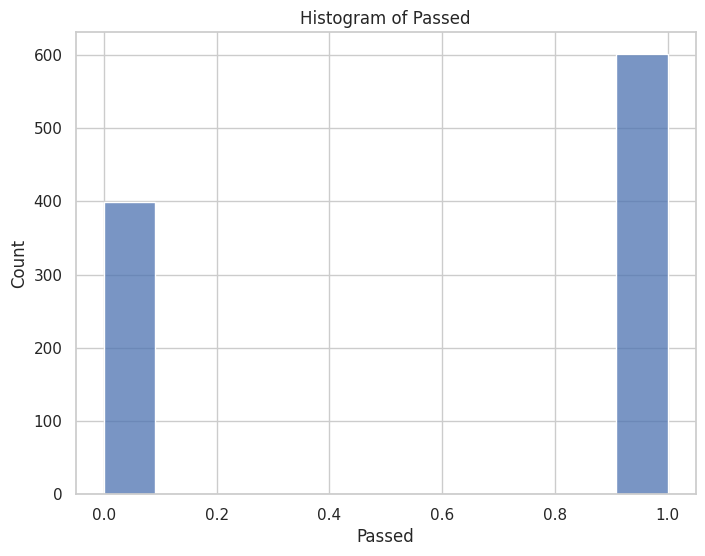

In [10]:
utils.visualize_single_feature_as_histogram(df, 'Passed')

##### 2. Extract the features and target dataframes

In [11]:
# Extract the target attribute and the features dataframe
target = df['Passed']
features = df.drop(columns=['Passed'])
features

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none
...,...,...,...,...,...
995,female,group E,master's degree,standard,completed
996,male,group C,high school,free/reduced,none
997,female,group C,high school,free/reduced,completed
998,female,group D,some college,standard,completed


##### 3. Categorical Encoding

In [12]:
features_encoded = pd.get_dummies(features)
features_encoded

,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,True,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,True
1,True,False,False,False,True,False,False,False,False,False,False,True,False,False,True,True,False
2,True,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,True
3,False,True,True,False,False,False,False,True,False,False,False,False,False,True,False,False,True
4,False,True,False,False,True,False,False,False,False,False,False,True,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,True,False
996,False,True,False,False,True,False,False,False,False,True,False,False,False,True,False,False,True
997,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False
998,True,False,False,False,False,True,False,False,False,False,False,True,False,False,True,True,False


# Model Training
In this section, we are going to train some sklearn classification models, namely LR, RF, KNN and DT. 
Steps: 
1. Split the data into train and test splits with 80% and 20% respectively. 
2. Model training & Model evaluation

##### 1. Split the data into train and test splits with 80% and 20% respectively.


In [13]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.2, random_state=42)


In [14]:
# Shape of the dfs
print("Shape of X_train {}".format(X_train.shape))
print('Shape of X_test {}'.format(X_test.shape))
print('Shape of y_train {}'.format(y_train.shape))
print('Shape of y_test {}'.format(y_test.shape))

Shape of X_train (800, 17)
Shape of X_test (200, 17)
Shape of y_train (800,)
Shape of y_test (200,)


##### 2. Model training & Evaluation


**Logistic Regression**

In [15]:
#Create and fit the model on training data
LR_model = LogisticRegression(solver='liblinear', penalty='l2', random_state=32).fit(X_train, y_train)

print("The accuracy score for the training data = {}".format(LR_model.score(X_train, y_train)))
print("The accuracy score for the testing data = {}".format(LR_model.score(X_test, y_test)))

The accuracy score for the training data = 0.71125
The accuracy score for the testing data = 0.66


**Support Vector Machine**


In [16]:
SVC_model = SVC(kernel='poly', degree=4, random_state=42).fit(X_train, y_train)
print("The accuracy score for the training data = {}".format(SVC_model.score(X_train, y_train)))
print("The accuracy score for the testing data = {}".format(SVC_model.score(X_test, y_test)))

The accuracy score for the training data = 0.7525
The accuracy score for the testing data = 0.63


In [17]:
SVC_model = SVC(kernel='rbf', C=0.5, gamma='scale', random_state=42).fit(X_train, y_train)
print("The accuracy score for the training data = {}".format(SVC_model.score(X_train, y_train)))
print("The accuracy score for the testing data = {}".format(SVC_model.score(X_test, y_test)))

The accuracy score for the training data = 0.725
The accuracy score for the testing data = 0.635


**Decision Tree**


In [18]:
DT_model = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
print("The accuracy score for the training data = {}".format(DT_model.score(X_train, y_train)))
print("The accuracy score for the testing data = {}".format(DT_model.score(X_test, y_test)))

The accuracy score for the training data = 0.75625
The accuracy score for the testing data = 0.59


### Apply PCA before training

In [19]:
principal=PCA(n_components=5)
X_train_pca = principal.fit_transform(X_train)
X_test_pca = principal.transform(X_test)
X_train_pca.shape

(800, 5)

**LR with PCA**

In [20]:
#Create and fit the model on training data
LR_model_pca = LogisticRegression(solver='liblinear', penalty='l2', random_state=32).fit(X_train_pca, y_train)

print("The accuracy score for the training data = {}".format(LR_model_pca.score(X_train_pca, y_train)))
print("The accuracy score for the testing data = {}".format(LR_model_pca.score(X_test_pca, y_test)))

The accuracy score for the training data = 0.6975
The accuracy score for the testing data = 0.645


**Support Vector Machine with PCA**


In [21]:
SVC_model_pca = SVC(kernel='rbf', C=0.5, gamma='scale', random_state=42).fit(X_train_pca, y_train)
print("The accuracy score for the training data = {}".format(SVC_model_pca.score(X_train_pca, y_train)))
print("The accuracy score for the testing data = {}".format(SVC_model_pca.score(X_test_pca, y_test)))

The accuracy score for the training data = 0.69125
The accuracy score for the testing data = 0.635


## Use Ordinal Encoding with PCA

1. Apply Ordinal Encoding

In [22]:
# Split the data into training and testing sets (80% train, 20% test)
X_train_oe, X_test_oe, y_train_oe, y_test_oe = train_test_split(features, target, test_size=0.3, random_state=42)

enc = OrdinalEncoder()
X_train_oe = enc.fit_transform(X_train_oe)
X_test_oe = enc.transform(X_test_oe)
X_train_oe.shape

(700, 5)

In [23]:
principal_oe=PCA(n_components=5)
X_train_oe_pca = principal_oe.fit_transform(X_train_oe)
X_test_oe_pca = principal_oe.transform(X_test_oe)
X_train_oe_pca.shape

(700, 5)

In [24]:
#Create and fit the model on training data
LR_model_oe_pca = LogisticRegression(solver='liblinear', penalty='l1', random_state=32).fit(X_train_oe_pca, y_train_oe)

print("The accuracy score for the training data = {}".format(LR_model_oe_pca.score(X_train_oe_pca, y_train_oe)))
print("The accuracy score for the testing data = {}".format(LR_model_oe_pca.score(X_test_oe_pca, y_test_oe)))

The accuracy score for the training data = 0.6971428571428572
The accuracy score for the testing data = 0.6633333333333333
